<a href="https://colab.research.google.com/github/UdayGhorapade/Deep-learning/blob/main/Marks_prediction_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/marks.csv")

In [3]:
data

,S1,S2,S3,S4,S5,S6,Total
0,12,23,21,12,20,10,98
1,10,10,11,9,11,20,71
2,12,11,11,10,10,7,61
3,23,21,12,20,11,23,110
4,10,11,9,11,12,10,63
5,12,11,11,12,9,11,66
6,23,21,12,9,11,21,97
7,12,11,11,21,12,11,78
8,23,21,12,11,9,11,87


In [4]:
data["Result"] = ["Pass" if Total >=80 else "Fail" for Total in data["Total"]]

In [5]:
data

,S1,S2,S3,S4,S5,S6,Total,Result
0,12,23,21,12,20,10,98,Pass
1,10,10,11,9,11,20,71,Fail
2,12,11,11,10,10,7,61,Fail
3,23,21,12,20,11,23,110,Pass
4,10,11,9,11,12,10,63,Fail
5,12,11,11,12,9,11,66,Fail
6,23,21,12,9,11,21,97,Pass
7,12,11,11,21,12,11,78,Fail
8,23,21,12,11,9,11,87,Pass


In [6]:
data['Result'] = data['Result'].replace("Fail", 0)
data['Result'] = data['Result'].replace("Pass", 1)

In [7]:
data

,S1,S2,S3,S4,S5,S6,Total,Result
0,12,23,21,12,20,10,98,1
1,10,10,11,9,11,20,71,0
2,12,11,11,10,10,7,61,0
3,23,21,12,20,11,23,110,1
4,10,11,9,11,12,10,63,0
5,12,11,11,12,9,11,66,0
6,23,21,12,9,11,21,97,1
7,12,11,11,21,12,11,78,0
8,23,21,12,11,9,11,87,1


In [14]:
dataset=data.values

In [15]:
dataset

array([[ 12,  23,  21,  12,  20,  10,  98,   1],
       [ 10,  10,  11,   9,  11,  20,  71,   0],
       [ 12,  11,  11,  10,  10,   7,  61,   0],
       [ 23,  21,  12,  20,  11,  23, 110,   1],
       [ 10,  11,   9,  11,  12,  10,  63,   0],
       [ 12,  11,  11,  12,   9,  11,  66,   0],
       [ 23,  21,  12,   9,  11,  21,  97,   1],
       [ 12,  11,  11,  21,  12,  11,  78,   0],
       [ 23,  21,  12,  11,   9,  11,  87,   1]])

In [20]:
X = dataset[:,0:6]
X

array([[12, 23, 21, 12, 20, 10],
       [10, 10, 11,  9, 11, 20],
       [12, 11, 11, 10, 10,  7],
       [23, 21, 12, 20, 11, 23],
       [10, 11,  9, 11, 12, 10],
       [12, 11, 11, 12,  9, 11],
       [23, 21, 12,  9, 11, 21],
       [12, 11, 11, 21, 12, 11],
       [23, 21, 12, 11,  9, 11]])

In [21]:
Y = dataset[:,7]
Y

array([1, 0, 0, 1, 0, 0, 1, 0, 1])

In [22]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [24]:
X_scale

array([[0.15384615, 1.        , 1.        , 0.25      , 1.        ,
        0.1875    ],
       [0.        , 0.        , 0.16666667, 0.        , 0.18181818,
        0.8125    ],
       [0.15384615, 0.07692308, 0.16666667, 0.08333333, 0.09090909,
        0.        ],
       [1.        , 0.84615385, 0.25      , 0.91666667, 0.18181818,
        1.        ],
       [0.        , 0.07692308, 0.        , 0.16666667, 0.27272727,
        0.1875    ],
       [0.15384615, 0.07692308, 0.16666667, 0.25      , 0.        ,
        0.25      ],
       [1.        , 0.84615385, 0.25      , 0.        , 0.18181818,
        0.875     ],
       [0.15384615, 0.07692308, 0.16666667, 1.        , 0.27272727,
        0.25      ],
       [1.        , 0.84615385, 0.25      , 0.16666667, 0.        ,
        0.25      ]])

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(6, 6) (1, 6) (2, 6) (6,) (1,) (2,)


In [48]:
from keras.models import Sequential
from keras.layers import Dense

In [49]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [50]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [52]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50
1/1 [==============================] - 0s 58ms/step - loss: 0.5799 - accuracy: 1.0000 - val_loss: 0.5618 - val_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 0.5787 - accuracy: 1.0000 - val_loss: 0.5606 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 27ms/step - loss: 0.5776 - accuracy: 1.0000 - val_loss: 0.5596 - val_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 28ms/step - loss: 0.5764 - accuracy: 1.0000 - val_loss: 0.5585 - val_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 29ms/step - loss: 0.5752 - accuracy: 1.0000 - val_loss: 0.5575 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 0.5740 - accuracy: 1.0000 - val_loss: 0.5564 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 0.5728 - accuracy: 1.0000 - val_loss: 0.5553 - val_accuracy: 1.0000
Epoch 8/50
1/1 [===========

In [53]:
model.evaluate(X_test, Y_test)[1]

1/1 [==============================] - 0s 101ms/step - loss: 0.6591 - accuracy: 1.0000


1.0

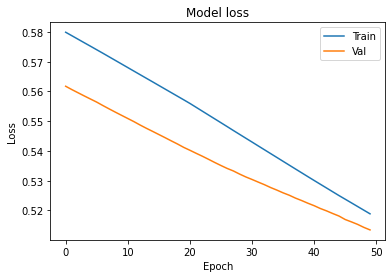

In [54]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [55]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(6,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50
1/1 [==============================] - 1s 775ms/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 54ms/step - loss: 0.6308 - accuracy: 1.0000 - val_loss: 0.6809 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 51ms/step - loss: 0.5244 - accuracy: 1.0000 - val_loss: 0.6122 - val_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 50ms/step - loss: 0.3755 - accuracy: 1.0000 - val_loss: 0.4826 - val_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 68ms/step - loss: 0.2233 - accuracy: 1.0000 - val_loss: 0.3043 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 52ms/step - loss: 0.1070 - accuracy: 1.0000 - val_loss: 0.1297 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 58ms/step - loss: 0.0401 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 8/50
1/1 [==========

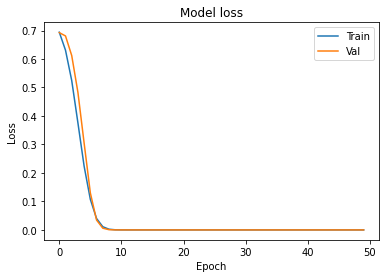

In [56]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [58]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(6,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [59]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(6,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [60]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 30.8460 - accuracy: 0.5000 - val_loss: 29.2992 - val_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 67ms/step - loss: 29.2999 - accuracy: 0.6667 - val_loss: 27.8053 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 64ms/step - loss: 27.8017 - accuracy: 0.8333 - val_loss: 26.3666 - val_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 78ms/step - loss: 26.3557 - accuracy: 0.8333 - val_loss: 24.9854 - val_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 66ms/step - loss: 24.9635 - accuracy: 1.0000 - val_loss: 23.6577 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 65ms/step - loss: 23.6203 - accuracy: 1.0000 - val_loss: 22.3822 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 75ms/step - loss: 22.3398 - accuracy: 0.8333 - val_loss: 21.1569 - val_accuracy: 1.0000
Epoch 8/50
1/1 

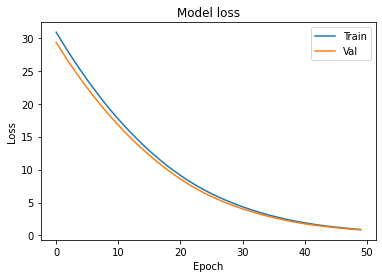

In [62]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()